In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 
import RIS_gravity_inversion.utils as utils

import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
# %load_ext snakeviz

/home/tankerma/miniconda/envs/grav_inv2/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


'/Users/home/tankerma/RIS_gravity_inversion'

# Functions

In [2]:
zoom = 0
n_shift = 0#150e3#600e3
w_shift = 0#-150e3#250e3
buffer = 300e3

# starting inversion region is 1,000km x 1,000km
e_inv = -580000+zoom+w_shift
w_inv = 420000-zoom+w_shift
n_inv = -1420000+zoom-n_shift
s_inv = -420000-zoom-n_shift

inv_reg = [e_inv, w_inv, n_inv, s_inv]
e_buff, w_buff, n_buff, s_buff = int(e_inv-buffer), int(w_inv+buffer), int(n_inv-buffer), int(s_inv+buffer)
buffer_reg = [e_buff, w_buff, n_buff, s_buff]
buffer_reg_str=f'{e_buff}/{w_buff}/{n_buff}/{s_buff}'
inv_reg_ll = "-180/180/-90/-71"

fig_height = 80
fig_width = fig_height*(w_inv-e_inv)/(s_inv-n_inv)

inv_ratio = (s_inv-n_inv)/(fig_height/1000)
buffer_ratio = (s_buff-n_buff)/(fig_height/1000)

inv_proj = f"x1:{inv_ratio}"
buffer_proj = f"x1:{buffer_ratio}"

inv_proj_ll = f"s0/-90/-71/1:{inv_ratio}"
buffer_proj_ll = f"s0/-90/-71/1:{buffer_ratio}"

layers_list = pd.Series([
             'ice',
             'water',
             'bathymetry',
            #  'basement',
            #  'moho'
])

spacing_list = pd.Series([
                10e3,
                10e3,
                10e3,
                # 10e3,
                # 20e3
])

rho_list = pd.Series([
            920, #890 to 917 from Muto et al. 2013
            1030, #from Muto et al. 2013
            2300,
            # 2670,
            # 3300
])

grav_spacing = 10e3

active_layer='bathymetry'

fname_list = pd.Series([
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc'
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc'
])

# forward_layers = {k:v for k,v in layers.items() if k not in ['ice']}

# inv_reg_ll = inv.GMT_reg_xy_to_ll(inv_reg)
# buffer_reg_ll = inv.GMT_reg_xy_to_ll(buffer_reg)

#  Import layers

filtering and resampling ice from 1000m to 10000m
filtering and resampling water from 1000m to 10000m
filtering and resampling bathymetry from 1000m to 10000m
ice: 25600 points, elevations: 3700m to 0m
water: 25600 points, elevations: 3698m to -2866m
bathymetry: 25600 points, elevations: 3698m to -4272m
gravity: 19666 points
gravity avg. elevation: 1000
bathymetry control points:8287288


,x,y,Gobs,z
count,19666.000000,1.966600e+04,1.966600e+04,19666.0
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0
std,223211.973413,1.971037e+05,1.300581e+01,0.0
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0


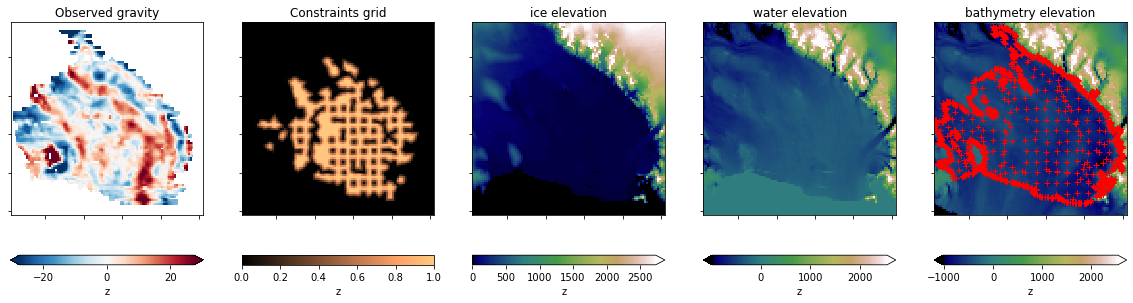

In [3]:
layers, df_grav, constraints_df, constraints_RIS_df = inv.import_layers(
    layers_list, 
    spacing_list, 
    rho_list, 
    fname_list,
    grav_spacing, 
    active_layer,
    buffer_reg,
    inv_reg,
    constraints=True,
    plot=True,
    plot_region=inv_reg
    )
df_grav.describe()

# Make prism layers

In [4]:
inv.grids_to_prism_layers(
    layers, 
    plot=False, 
    plot_type='3D', 
    plot_region=inv_reg,
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

bathymetry top: -380m and bottom: -4272m
water top: 29m and bottom: -380m
ice top: 1006m and bottom: 29m


# Forward gravity

finished ice layer
finished water layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,19666.000000,1.966600e+04,1.966600e+04,19666.0,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0,5.549647e-16,-2.959812e-15,3.149425e-14,2.848819e-14
std,223211.973413,1.971037e+05,1.300581e+01,0.0,6.515682e+00,7.752555e+00,1.258873e+01,1.006011e+01
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0,-1.817150e+01,-1.122012e+01,-4.499518e+01,-5.621409e+01
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0,-3.111250e+00,-6.854386e+00,-7.863699e+00,-5.255974e+00
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0,-1.321140e+00,-1.931348e-01,-5.422859e-01,4.490952e-01
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0,2.916359e+00,5.565900e+00,7.021912e+00,4.910126e+00
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0,3.406776e+01,2.529510e+01,1.390394e+02,1.289195e+02


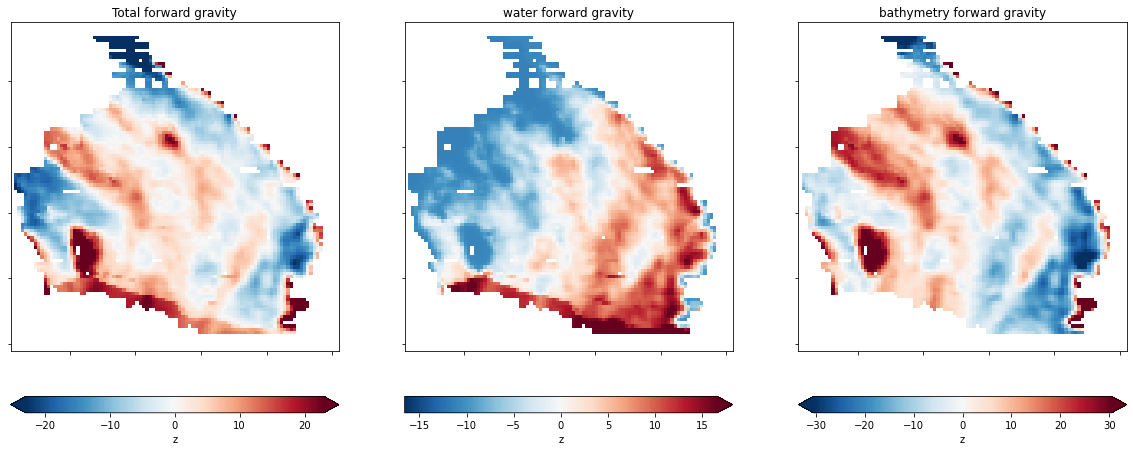

In [5]:
df_forward = inv.forward_grav_layers(layers, df_grav, ['ice'], inv_reg, grav_spacing, plot=True)
df_forward.describe()
# notify

# Anomalies

In [6]:
# regional_method='constraints'
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], plot=True, plot_type='xarray', 
#         constraints_df=constraints_df, constraints_RIS_df=constraints_RIS_df)
# df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,19666.000000,1.966600e+04,1.966600e+04,19666.0,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,1.966600e+04,19666.000000,19666.000000
mean,-93661.903793,-9.902100e+05,-3.699765e-16,1000.0,5.549647e-16,-2.959812e-15,3.149425e-14,2.848819e-14,-1.109929e-15,-2.922814e-14,0.043526,-0.043526
std,223211.973413,1.971037e+05,1.300581e+01,0.0,6.515682e+00,7.752555e+00,1.258873e+01,1.006011e+01,1.555937e+01,1.341480e+01,9.013847,7.824779
min,-562500.000000,-1.362500e+06,-8.287405e+01,1000.0,-1.817150e+01,-1.122012e+01,-4.499518e+01,-5.621409e+01,-1.031089e+02,-1.228216e+02,-28.033623,-103.553446
25%,-262500.000000,-1.147500e+06,-7.653712e+00,1000.0,-3.111250e+00,-6.854386e+00,-7.863699e+00,-5.255974e+00,-8.862187e+00,-7.762947e+00,-5.650672,-3.746302
50%,-92500.000000,-1.002500e+06,1.524566e-01,1000.0,-1.321140e+00,-1.931348e-01,-5.422859e-01,4.490952e-01,1.784934e+00,3.946871e-01,-0.666388,0.121168
75%,82500.000000,-8.475000e+05,7.794796e+00,1000.0,2.916359e+00,5.565900e+00,7.021912e+00,4.910126e+00,9.820269e+00,8.176380e+00,5.098990,4.173967
max,362500.000000,-4.675000e+05,7.537033e+01,1000.0,3.406776e+01,2.529510e+01,1.390394e+02,1.289195e+02,6.422924e+01,5.497891e+01,26.091343,52.784088


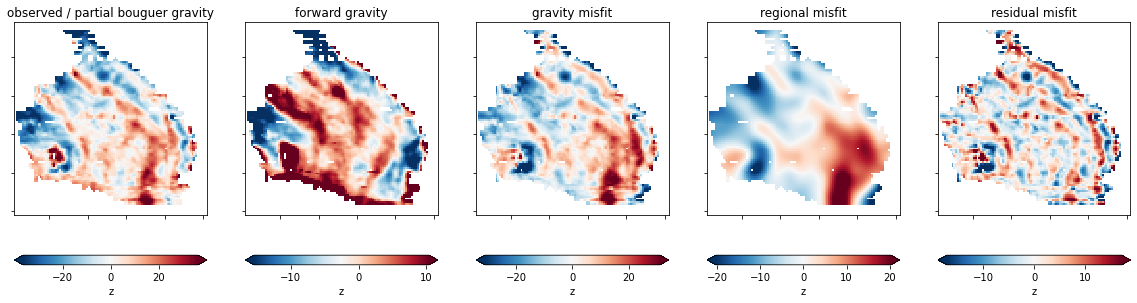

In [7]:
regional_method='filter'
filter='g200e3'
df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
        corrections=['ice'], filter=filter, plot=True, plot_type='xarray')
df_anomalies.describe()

In [8]:
# regional_method='trend'
# trend_order=8
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], trend_order=trend_order, plot=True, plot_type='xarray')
# df_anomalies.describe()

# Geo inversion

In [9]:
# %%snakeviz -t
regional_method='filter'
filter='g200e3'
trend_order=8
iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    exclude_layers=['ice'],
    layers=layers, 
    input_grav=df_anomalies, 
    input_grav_column='Gobs',
    regional_method=regional_method, 
    grav_spacing = grav_spacing,
    inversion_region=inv_reg,
    buffer_region=buffer_reg,
    filter=filter, 
    trend_order=trend_order,
    deriv_type='annulus',
    # reset=True,
    constraints=False,
    Max_Iterations=3,
    max_layer_change_per_iter=100,
    misfit_sq_tolerance=0.00001,
    delta_misfit_squared_tolerance=0.002,
    ) 
# 15 mins 200km zoom/5k, 7mins 400kmzoom/5k (113x113 prisms, 33x33 grav) 
# 1:54s for annulus
# 1:46s for prisms
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 5th trend,: 18m 3s
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 400km filter,: 19m 35s

# 07/26/22, with gravity as DataFrame, just ROSETTA, 10km res, Ice/Water/Bathy, annulus, 3its, 200km filter,: 43mins
# looks to be invert for all prisms, not just those at grav points
notify

##################################
iteration 1
initial RMS residual = 7.82mGal
finished jacobian
finished least squares
average layers correction 97.08m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 6.58mGal
##################################
iteration 2
initial RMS residual = 6.58mGal
finished jacobian
finished least squares
average layers correction 99.87m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 6.65mGal
terminated - no significant variation in least-squares norm 


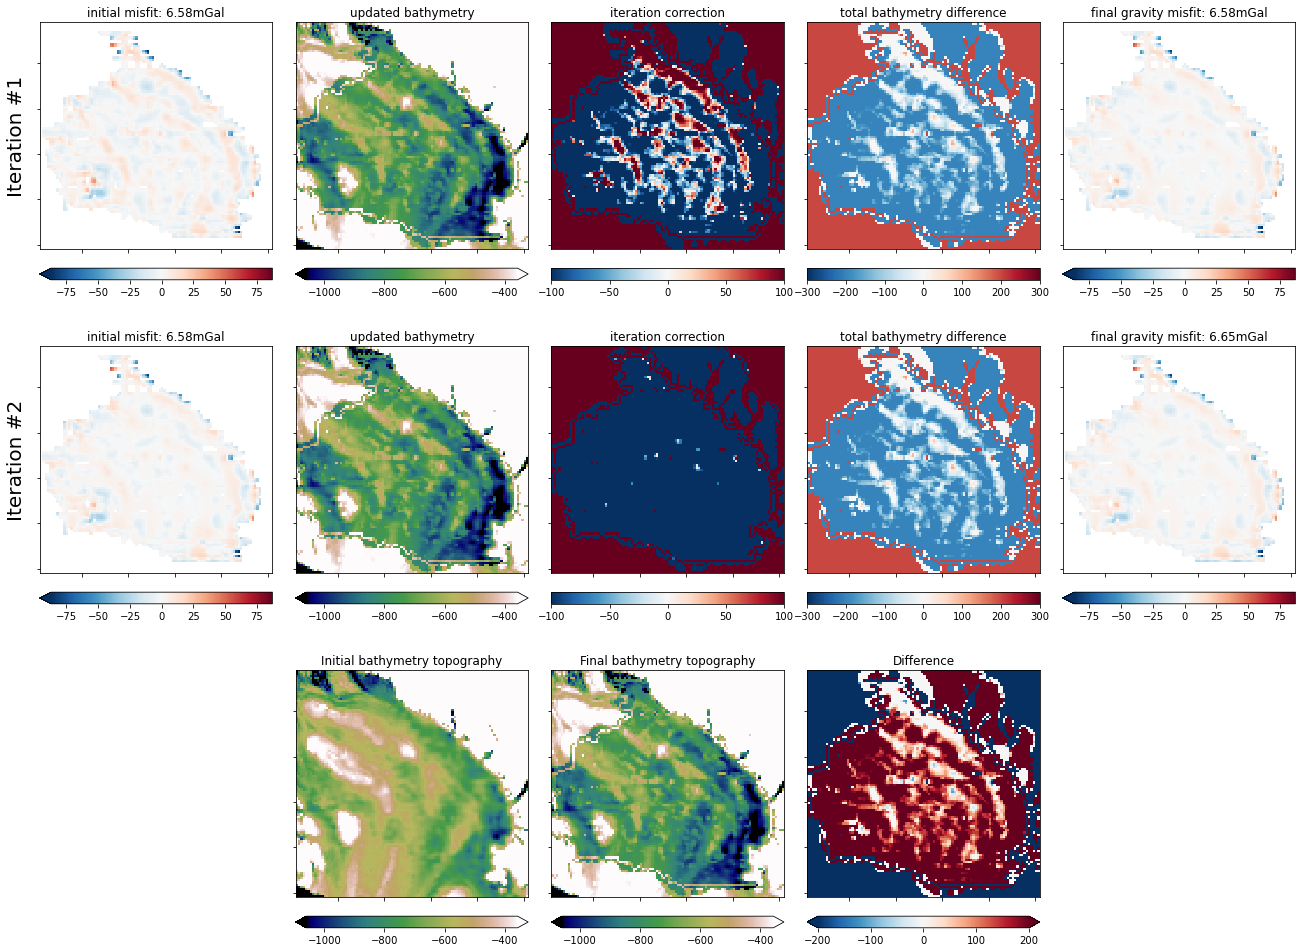

In [10]:
inv.plot_inversion_results(
    input_grav = df_anomalies,
    inversion_region = inv_reg,
    active_layer = 'bathymetry',
    grav_spacing = grav_spacing,
    epsg = 'epsg:3031',
    max_layer_change_per_iter = 100,
    constraints_RIS_df = constraints_RIS_df,
    constraints = False,
    layers = layers,
    iter_corrections = iter_corrections,
)

# Density inversion

In [11]:
# density_inversion(density_layer='bathymetry', plot=True) #10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify